In [1]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Augmentation

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# مسار مجلد الصور الأساسي
dataset_dir = r'D:\project\text_dataset'
  # عدل المسار حسب مكانك

# عدد الصور المستهدف لكل فئة
target_count = 150

# إعداد Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # تدوير
    width_shift_range=0.1,   # إزاحة عرضية
    height_shift_range=0.1,  # إزاحة طولية
    shear_range=0.1,         # القص
    zoom_range=0.2,          # التكبير والتصغير
    horizontal_flip=True,    # القلب الأفقي
    brightness_range=[0.8, 1.2],  # إضاءة
    fill_mode='nearest'
)

# الحصول على الفئات
categories = os.listdir(dataset_dir)
categories = [cat for cat in categories if os.path.isdir(os.path.join(dataset_dir, cat))]

# عملية التوليد
for category in categories:
    path = os.path.join(dataset_dir, category)
    images = [img for img in os.listdir(path) if img.endswith(('.png', '.jpg', '.jpeg'))]
    current_count = len(images)
    
    print(f"🔍 فئة: {category} | عدد الصور الحالي: {current_count}")

    if current_count >= target_count:
        print(f"✅ {category}: لا يحتاج Augmentation.")
        continue  # خلاص مش محتاجين تزود
    
    img_num = current_count
    for img_name in images:
        if img_num >= target_count:
            break  # وقف لما توصل 100 صورة

        img_path = os.path.join(path, img_name)
        image = cv2.imread(img_path)
        if image is None:
            print(f"❌ مشكلة في قراءة الصورة: {img_path}")
            continue

        # تغيير شكل الصورة لتناسب Keras
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.expand_dims(image, 0)

        # Augmentation
        aug_iter = datagen.flow(image, batch_size=1)
        for i in range(5):  # جرب تعمل 5 نسخ من كل صورة (غير لازم تكرر الكتير لو وصلت 100)
            if img_num >= target_count:
                break
            aug_image = next(aug_iter)[0].astype(np.uint8)
            aug_image = cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR)
            save_path = os.path.join(path, f"aug_{img_num}.jpg")
            cv2.imwrite(save_path, aug_image)
            img_num += 1

    print(f"✅ {category}: تم الوصول إلى {img_num} صورة.")

print("🎉 تم الانتهاء من Augmentation لكل الفئات!")


🔍 فئة: أب | عدد الصور الحالي: 150
✅ أب: لا يحتاج Augmentation.
🔍 فئة: أخت | عدد الصور الحالي: 150
✅ أخت: لا يحتاج Augmentation.
🔍 فئة: اتمني لك حياه سعيده | عدد الصور الحالي: 150
✅ اتمني لك حياه سعيده: لا يحتاج Augmentation.
🔍 فئة: اسف | عدد الصور الحالي: 150
✅ اسف: لا يحتاج Augmentation.
🔍 فئة: السلام عليكم | عدد الصور الحالي: 150
✅ السلام عليكم: لا يحتاج Augmentation.
🔍 فئة: اهلا وسهلا | عدد الصور الحالي: 150
✅ اهلا وسهلا: لا يحتاج Augmentation.
🔍 فئة: بحبك | عدد الصور الحالي: 150
✅ بحبك: لا يحتاج Augmentation.
🔍 فئة: بطه | عدد الصور الحالي: 150
✅ بطه: لا يحتاج Augmentation.
🔍 فئة: توأم | عدد الصور الحالي: 150
✅ توأم: لا يحتاج Augmentation.
🔍 فئة: حفيد | عدد الصور الحالي: 150
✅ حفيد: لا يحتاج Augmentation.
🔍 فئة: حمل | عدد الصور الحالي: 150
✅ حمل: لا يحتاج Augmentation.
🔍 فئة: خال | عدد الصور الحالي: 150
✅ خال: لا يحتاج Augmentation.
🔍 فئة: رجل | عدد الصور الحالي: 150
✅ رجل: لا يحتاج Augmentation.
🔍 فئة: رضيع | عدد الصور الحالي: 150
✅ رضيع: لا يحتاج Augmentation.
🔍 فئة: زواج | عدد ال

Output Augmentation

In [5]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ==============================
# 1. إعداد المسار لمجلد الصور
# ==============================
dataset_path = r'D:\project\text_dataset'  # ⚠️ عدل هنا مسار مجلد الداتا بتاعك

# ==============================
# 2. قوائم لتخزين الصور والليبلات
# ==============================
images = []
labels = []

# ==============================
# 3. قراءة الصور وتجهيزها
# ==============================
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(('.jpg', '.png', '.jpeg')):  # دعم أكثر من نوع
                image_path = os.path.join(folder_path, filename)

                # قراءة الصورة
                image = cv2.imread(image_path)

                if image is not None:  # تأكد الصورة تقرأت صح
                    # تغيير حجم الصورة
                    image = cv2.resize(image, (64, 64))  # ⚠️ غير المقاس لو محتاج

                    # تحويل الصورة لقيم بين 0 و 1
                    image = image.astype('float32') / 255.0

                    # إضافة الصورة والليبل
                    images.append(image)
                    labels.append(folder_name)
                else:
                    print(f"تحذير: لم يتم قراءة الصورة {image_path}")

# ==============================
# 4. تحويل القوائم إلى numpy arrays
# ==============================
images = np.array(images)
labels = np.array(labels)

# ==============================
# 5. تحويل الليبلات إلى أرقام
# ==============================
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

print("تم تجهيز الصور والليبلات بنجاح!")
print(f"عدد الصور: {images.shape[0]}")
print(f"شكل كل صورة: {images.shape[1:]}")
print(f"عدد الفئات: {len(np.unique(labels))}")

# ==============================
# 6. تقسيم البيانات (اختياري هنا للتدريب والاختبار)
# ==============================
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

print(f"عدد بيانات التدريب: {len(X_train)}")
print(f"عدد بيانات الاختبار: {len(X_test)}")


تم تجهيز الصور والليبلات بنجاح!
عدد الصور: 4050
شكل كل صورة: (64, 64, 3)
عدد الفئات: 27
عدد بيانات التدريب: 3240
عدد بيانات الاختبار: 810


CNN Model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==============================
# 1. تحديد عدد الفئات (classes)
# ==============================
num_classes = len(np.unique(labels_encoded))  # عدد الإشارات

# ==============================
# 2. بناء النموذج
# ==============================
model = Sequential()

# أول طبقة: Convolution
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# ثاني طبقة: Convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# ثالث طبقة: Convolution
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten لتحويل الصورة إلى متجه
model.add(Flatten())

# طبقة مخفية (Dense)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # تقليل overfitting

# الطبقة الأخيرة (الخاصة بالإشارات)
model.add(Dense(num_classes, activation='softmax'))  # تصنيف متعدد

# ==============================
# 3. تجميع (compile) النموذج
# ==============================
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ==============================
# 4. عرض ملخص النموذج
# ==============================
model.summary()


C:\Users\Eng Hassan Abozied\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,683 (2.62 MB)

 Trainable params: 686,683 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

Graphic
accuracy,
loss

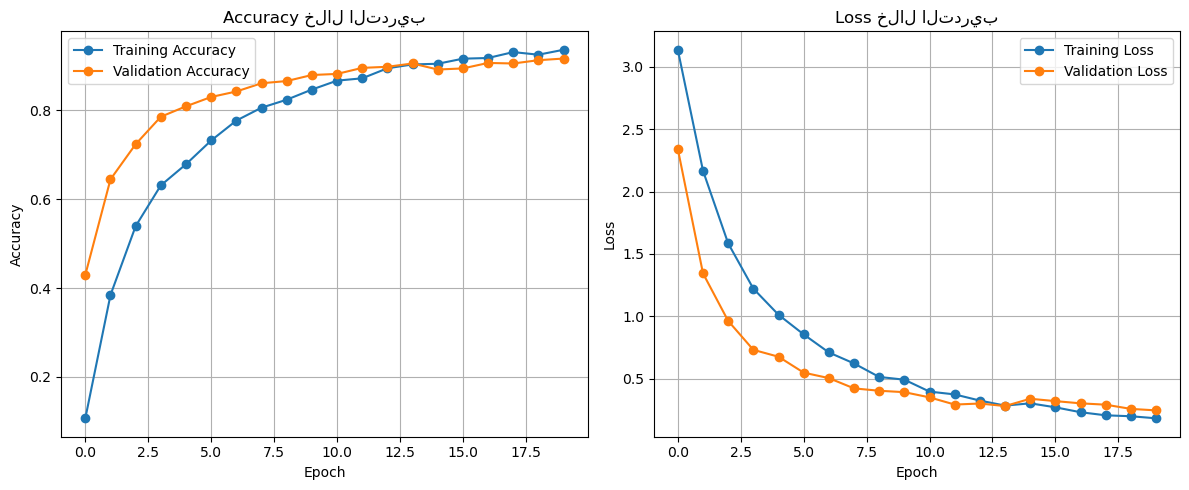

In [9]:
import matplotlib.pyplot as plt

# ==============================
# 6. رسم دقة التدريب والاختبار
# ==============================

# رسم دقة التدريب والاختبار
plt.figure(figsize=(12, 5))

# الرسم الأول: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy خلال التدريب')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# ==============================
# 7. رسم خسارة التدريب والاختبار
# ==============================

# الرسم الثاني: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss خلال التدريب')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ==============================
# 8. عرض الرسوم
# ==============================
plt.tight_layout()
plt.show()


ِAccuracy 

In [10]:
# ==============================
# 6. تقييم الأداء
# ==============================
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"دقة الاختبار: {test_accuracy * 100:.2f}%")


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9017 - loss: 0.2944
دقة الاختبار: 91.60%


Save Model

In [11]:
model.save("sign_language_model.h5")
print("تم حفظ النموذج بنجاح!")


تم حفظ النموذج بنجاح!


Backend (FastAPI)

In [1]:
pip install fastapi uvicorn python-multipart tensorflow pillow


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import JSONResponse
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os

app = FastAPI()

# تحميل الموديل
model = load_model('sign_language_model.h5')

# قراءة الإشارات (أسماء الفولدرات) تلقائي
dataset_path = r'D:\project\text_dataset'  # ✳️ غيرها لمسار الفولدر الأساسي
classes = sorted(os.listdir(dataset_path))  # ترتيب الكلاسات حسب أسماء الفولدرات
print(f"Loaded Classes: {classes}")

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    # تجهيز الصورة
    image = Image.open(file.file).resize((64, 64))  # ✳️ غير المقاس حسب تدريبك (مثلاً 64x64 لو دربت عليه كده)
    img_array = np.array(image) / 255.0  # تجهيز الصورة
    img_array = np.expand_dims(img_array, axis=0)  # شكل البيانات

    # التنبؤ
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_word = classes[predicted_class]  # الإشارة المتوقعة

    return JSONResponse(content={"class": predicted_class, "word": predicted_word})


Loaded Classes: ['Model.ipynb', 'final_model.h5', 'final_model_balanced.h5', 'final_model_balanced_v2.h5', 'أب', 'أخت', 'اتمني لك حياه سعيده', 'اسف', 'السلام عليكم', 'اهلا وسهلا', 'بحبك', 'بطه', 'توأم', 'حفيد', 'حمل', 'خال', 'رجل', 'رضيع', 'زواج', 'سؤال', 'شجره', 'طلاق', 'عم', 'عمل جيد', 'لا', 'مبادئ لغه الاشاره', 'مسن', 'موافق', 'ناس', 'هاتف', 'ولاده']
